## Problem Statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.

Can you use the data to help you identify which cities may potentially give your business higher profits?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [ ]:
X_train, y_train = load_data()
print(f"The type of X_train is {type(X_train)} with shape {X_train.shape} and the first 5 samples:\n {np.round(X_train[:5], 2)}")
print(f"The type of y_train is {type(y_train)} with shape {y_train.shape} and the first 5 samples:\n {np.round(y_train[:5], 2)}")

The type of X_train is <class 'numpy.ndarray'> with shape (97,) and the first 5 samples:
 [6.11 5.53 8.52 7.   5.86]
The type of y_train is <class 'numpy.ndarray'> with shape (97,) and the first 5 samples:
 [17.59  9.13 13.66 11.85  6.82]


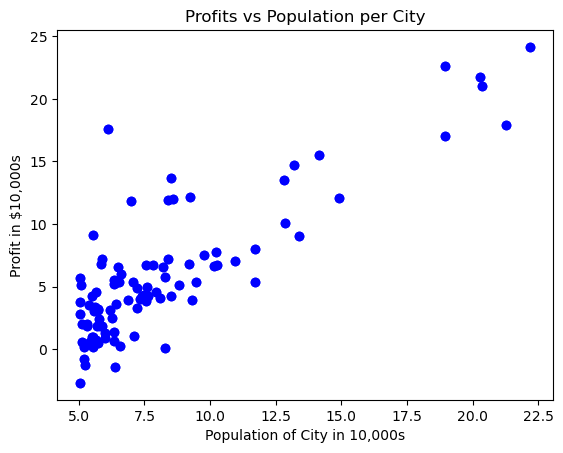

In [17]:
plt.scatter(X_train, y_train, color = 'blue', marker = 'o')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("City Population vs. Profit"),
plt.title("Profits vs Population per City")
plt.show()

A function to calculate  𝐽(𝑤,𝑏) so that I can check the progress of the gradient descent implementation.

In [22]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost = (f_wb - y[i]) **2
        cost_sum = cost_sum + cost
    total_cost = cost_sum / (2 * m)
    return total_cost

initial_w = 2
initial_b = 1

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


Next is to compute the gradient for parameters  𝑤,𝑏 for linear regression.



In [25]:
import test


def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        error = f_wb - y[i]
        dj_dw_i = error * x[i]
        dj_db_i = error
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db
#with w and b set to zero
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

#with w and b not set to zero
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, test_w, test_b)
print('Gradient at test w, b (0.2, 0.2):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Gradient at test w, b (0.2, 0.2): -47.41610118114435 -4.007175051546391


With batch gradient descent, I can run all examples in a single iteration

In [30]:
def batch_gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b, J_history, w_history
initial_b = 0
initial_w = 0
iterations = 1500
alpha = 0.01
w, b, J_history, w_history = batch_gradient_descent(X_train, y_train, initial_w, initial_b,
                                                     compute_cost, compute_gradient,
                                                     alpha, iterations)
print(f"b: {b:0.2f}, w: {w:0.2f} ")

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
b: -3.63, w: 1.17 


To plot, the prediction for the entire data set is needed. Prediction is used to evaluate the model performance and to visualize the result.

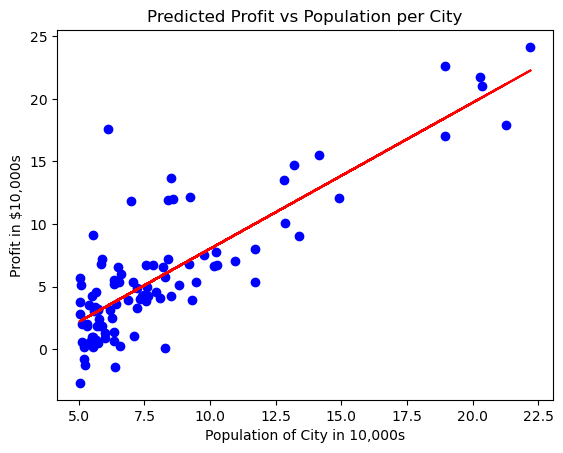

In [32]:
m = X_train.shape[0]
prediction = np.zeros(m)
for i in range(m):
    prediction[i] = np.dot(X_train[i], w) + b

plt.plot(X_train, prediction, c = 'r')
plt.scatter(X_train, y_train, c = 'b', marker = 'o')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Predicted Profit vs Population per City")
plt.show()